In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import imp
import numpy as np
from scipy import stats

MORAN_DATA_PATH = "/home/vince/rsc/axelrod-moran/data/main.csv"
parameters = imp.load_source("parameters", "../../../data/raw/parameters.py")
player_names = [player.__repr__() for player in parameters.PLAYER_GROUPS["full"]]

In [2]:
sse_df = pd.read_csv("../../../data/processed/full/std/per_opponent/main.csv")[['Player index', 'Opponent index', 'residual']]
sse_df

,Player index,Opponent index,residual
0,0,0,NaN
1,0,1,1.332843e-07
2,0,2,5.882353e-02
3,0,3,1.332843e-07
4,0,4,1.633987e-03
5,0,5,2.614379e-02
6,0,6,NaN
7,0,7,5.882353e-02
8,0,8,9.411765e-03
9,0,9,1.470588e-02


In [3]:
moran_df = pd.read_csv(MORAN_DATA_PATH)
def find_index(name, player_names=player_names):
    try:
        return int(player_names.index(name))
    except ValueError:
        return -1
moran_df["Player index"] = moran_df["player"].map(find_index)
moran_df["Opponent index"] = moran_df["opponent"].map(find_index)

In [4]:
moran_df.head()

,player,opponent,N,$p_1$,$p_{N/2}$,$p_{N-1}$,Player index,Opponent index
0,$\phi$,$\pi$,2,0.849,0.849,0.855,77,121
1,$\phi$,$e$,2,0.849,0.849,0.855,77,200
2,$\phi$,ALLCorALLD,2,0.594,0.594,0.582,77,4
3,$\phi$,Adaptive,2,0.027,0.027,0.040,77,0
4,$\phi$,Adaptive Pavlov 2006,2,0.479,0.479,0.467,77,10


In [5]:
df = moran_df.merge(sse_df, on=("Player index", "Opponent index"), how="right").dropna()
df.head()

,player,opponent,N,$p_1$,$p_{N/2}$,$p_{N-1}$,Player index,Opponent index,residual
39,$\phi$,Adaptive,2.0,0.027,0.027,0.040,77,0,0.529412
41,$\phi$,Adaptive,4.0,0.001,0.045,0.287,77,0,0.529412
43,$\phi$,Adaptive,6.0,0.001,0.017,0.348,77,0,0.529412
45,$\phi$,Adaptive,8.0,0.000,0.009,0.363,77,0,0.529412
47,$\phi$,Adaptive,10.0,0.000,0.004,0.373,77,0,0.529412


In [6]:
# fig, axarr = plt.subplots(df["N"].nunique(), 3, figsize=(10, 15))

# for row, N in enumerate(df["N"].unique()):
#     ax = axarr[row, 0]
#     data = df[df["N"] == N]
    
#     ax.scatter(data["$p_1$"], data["residual"])
#     ax.set_title(f"$N={int(N)}$")
#     ax.set_xlabel("$p_1$")
#     ax.set_ylabel("SSerror")
    
#     for col, col_name in enumerate(("$p_1$", "residual")):
#         array = np.zeros((data["Player index"].nunique(), data["Opponent index"].nunique()))
#         for i, player_index in enumerate(data["Player index"].unique()):
#             for j, opponent_index in enumerate(data["Opponent index"].unique()):
#                 try:
#                     value = list(data[(data["Player index"] == player_index) & (data["Opponent index"] == opponent_index)][col_name])[0]
#                 except IndexError:
#                     value = np.nan
#                 array[i, j] = value
        
#         ax = axarr[row, 1 + col]
#         im = ax.imshow(array)
#         ax.set_title(col_name)
#         plt.colorbar(im, ax=ax)
# fig.tight_layout()
# fig.savefig("main.pdf")

In [53]:
def plot_quantiles(lower_quantile=0, upper_quantile=100):

    fig, axarr = plt.subplots(df["N"].nunique(), 4, figsize=(20, 15))


    for row, N in enumerate(df["N"].unique()):
    #     ax = axarr[row, 0]


    #     _, _, _, im = ax.hist2d(data["$p_1$"], data["residual"])
    #     ax.set_title(f"$N={int(N)}$")
    #     ax.set_xlabel("$p_1$")
    #     ax.set_ylabel("SSerror")
    #     plt.colorbar(im, ax=ax)

        data = df[df["N"] == N]
        sse_upper_quantile = data["residual"].quantile(upper_quantile)
        sse_lower_quantile = data["residual"].quantile(lower_quantile)
        data = data[(df["residual"] <= sse_upper_quantile) & (df["residual"] >= sse_lower_quantile)]
        p1_upper_quantile = data["$p_1$"].quantile(upper_quantile)
        p1_lower_quantile = data["$p_1$"].quantile(lower_quantile)
        data = data[(df["$p_1$"] <= p1_upper_quantile) & (df["$p_1$"] >= p1_lower_quantile)]
    
        ax = axarr[row, 0]

        summary_df = data.groupby("Player index")[["residual", "$p_1$"]].agg(("mean", "median", "std"))

        im = ax.scatter(summary_df["$p_1$"]["mean"], summary_df["residual"]["mean"])
        ax.set_xlabel("Mean $p_1$")
        ax.set_ylabel("Mean SSerror")


        slope, intercept, r_value, p_value, std_err = stats.linregress(summary_df["$p_1$"]["mean"], 
                                                                       summary_df["residual"]["mean"])

        ax.plot(summary_df["$p_1$"]["mean"], slope * summary_df["$p_1$"]["mean"] + intercept, color="red")
        ax.set_title(f"(Data: {100 * lower_quantile} - {100 * upper_quantile}%) $N={int(N)}$, p$={round(p_value, 3)}$, $R^2={round(r_value**2, 3)}$, std_err={round(std_err, 3)}")


        ax = axarr[row, 1]

        summary_df["log(mean(residual))"] = np.log(summary_df["residual"]["mean"])
        summary_df.replace([np.inf, -np.inf], np.nan, inplace=True)
        summary_df.dropna(inplace=True)


        slope, intercept, r_value, p_value, std_err = stats.linregress(summary_df["$p_1$"]["mean"], 
                                                                       summary_df["log(mean(residual))"])

        im = ax.scatter(summary_df["$p_1$"]["mean"], summary_df["log(mean(residual))"])
        ax.set_title(f"(Data: {100 * lower_quantile} - {100 * upper_quantile}%) $N={int(N)}$, p$={round(p_value, 3)}$, $R^2={round(r_value**2, 3)}$, std_err={round(std_err, 3)}")
        ax.set_xlabel("Mean $p_1$")
        ax.set_ylabel("log(Mean SSerror)")

        ax.plot(summary_df["$p_1$"]["mean"], slope * summary_df["$p_1$"]["mean"] + intercept, color="red")


        ax = axarr[row, 2]

        summary_df["log(mean(p1))"] = np.log(summary_df["$p_1$"]["mean"])
        summary_df.replace([np.inf, -np.inf], np.nan, inplace=True)
        summary_df.dropna(inplace=True)


        slope, intercept, r_value, p_value, std_err = stats.linregress(summary_df["log(mean(p1))"], 
                                                                       summary_df["log(mean(residual))"])

        im = ax.scatter(summary_df["log(mean(p1))"], summary_df["log(mean(residual))"])
        ax.set_title(f"(Data: {100 * lower_quantile} - {100 * upper_quantile}%) $N={int(N)}$, p$={round(p_value, 3)}$, $R^2={round(r_value**2, 3)}$, std_err={round(std_err, 3)}")
        ax.set_xlabel("log(Mean $p_1$)")
        ax.set_ylabel("log(Mean SSerror)")

        ax.plot(summary_df["log(mean(p1))"], slope * summary_df["log(mean(p1))"] + intercept, color="red")

        
        ax = axarr[row, 3]
        summary_df["coeff_of_variation"] = summary_df["residual"]["std"] / summary_df["residual"]["mean"]

        slope, intercept, r_value, p_value, std_err = stats.linregress(summary_df["$p_1$"]["mean"],
                                                                       summary_df["coeff_of_variation"])

        im = ax.scatter(summary_df["$p_1$"]["mean"], summary_df["coeff_of_variation"])
        ax.set_title(f"(Data: {100 * lower_quantile} - {100 * upper_quantile}%) $N={int(N)}$, p$={round(p_value, 3)}$, $R^2={round(r_value**2, 3)}$, std_err={round(std_err, 3)}")
        ax.set_xlabel("Mean $p_1$")
        ax.set_ylabel("$c_v$ SSerror")
        
        ax.plot(summary_df["$p_1$"]["mean"], slope * summary_df["$p_1$"]["mean"] + intercept, color="red")

        
    fig.tight_layout()

/home/vince/anaconda3/envs/testing-zd/lib/python3.6/site-packages/ipykernel/__main__.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/vince/anaconda3/envs/testing-zd/lib/python3.6/site-packages/ipykernel/__main__.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/vince/anaconda3/envs/testing-zd/lib/python3.6/site-packages/ipykernel/__main__.py:42: RuntimeWarning: divide by zero encountered in log


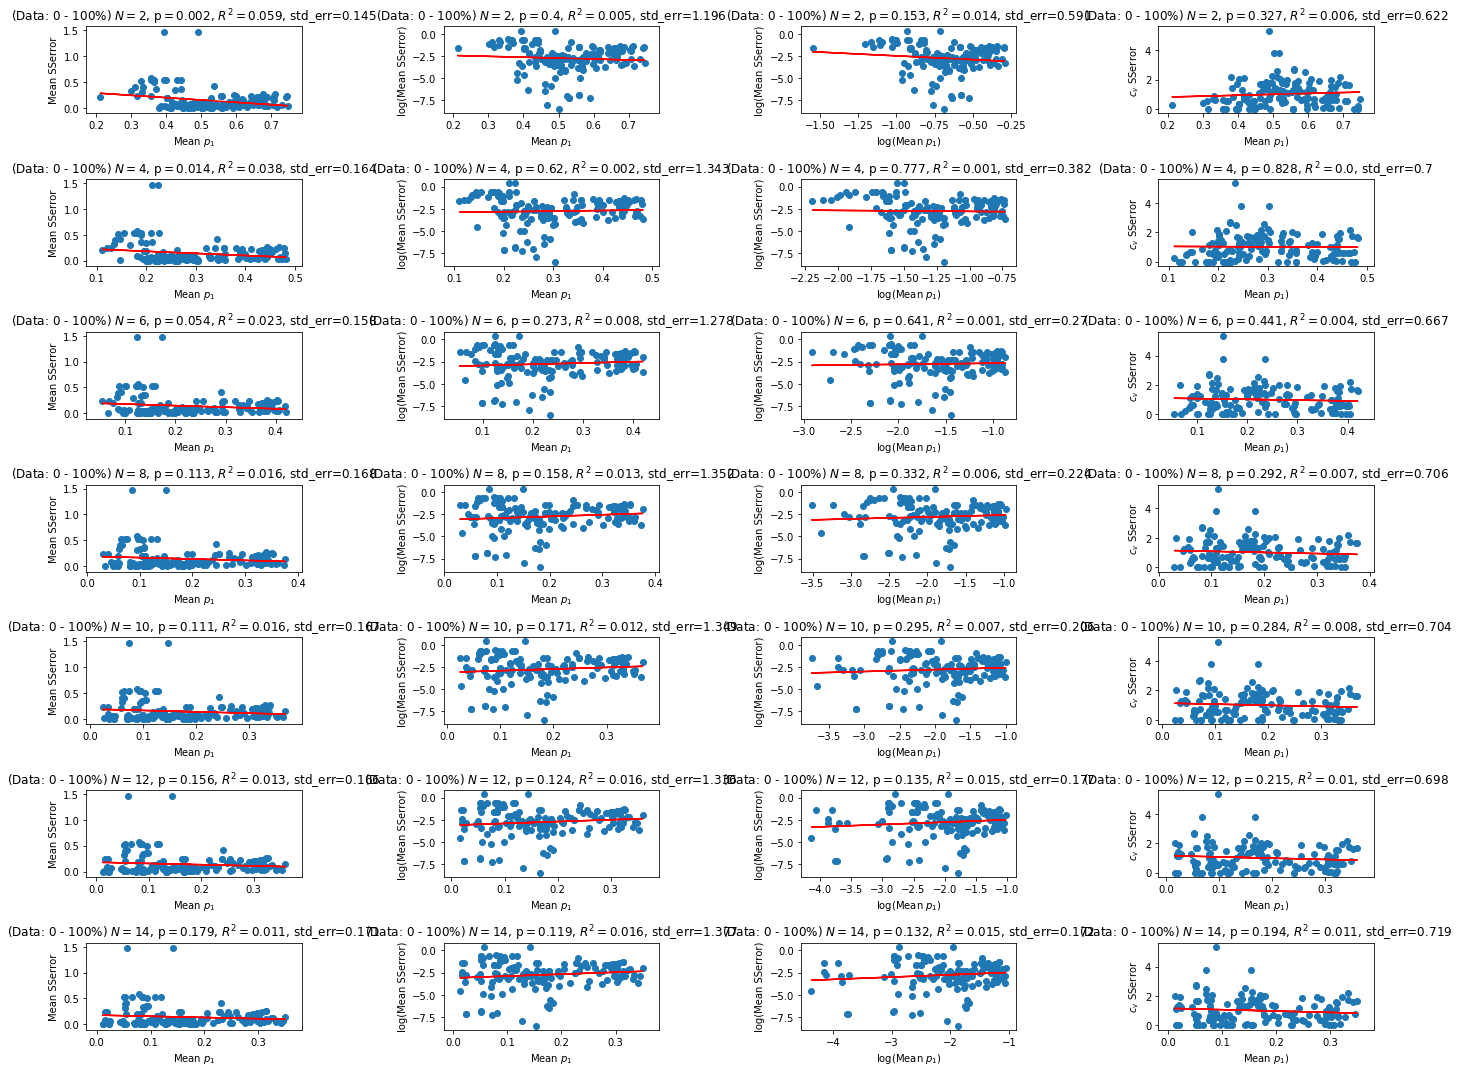

In [54]:
plot_quantiles(lower_quantile=0, upper_quantile=1)

/home/vince/anaconda3/envs/testing-zd/lib/python3.6/site-packages/ipykernel/__main__.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/vince/anaconda3/envs/testing-zd/lib/python3.6/site-packages/ipykernel/__main__.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/vince/anaconda3/envs/testing-zd/lib/python3.6/site-packages/ipykernel/__main__.py:43: RuntimeWarning: divide by zero encountered in log


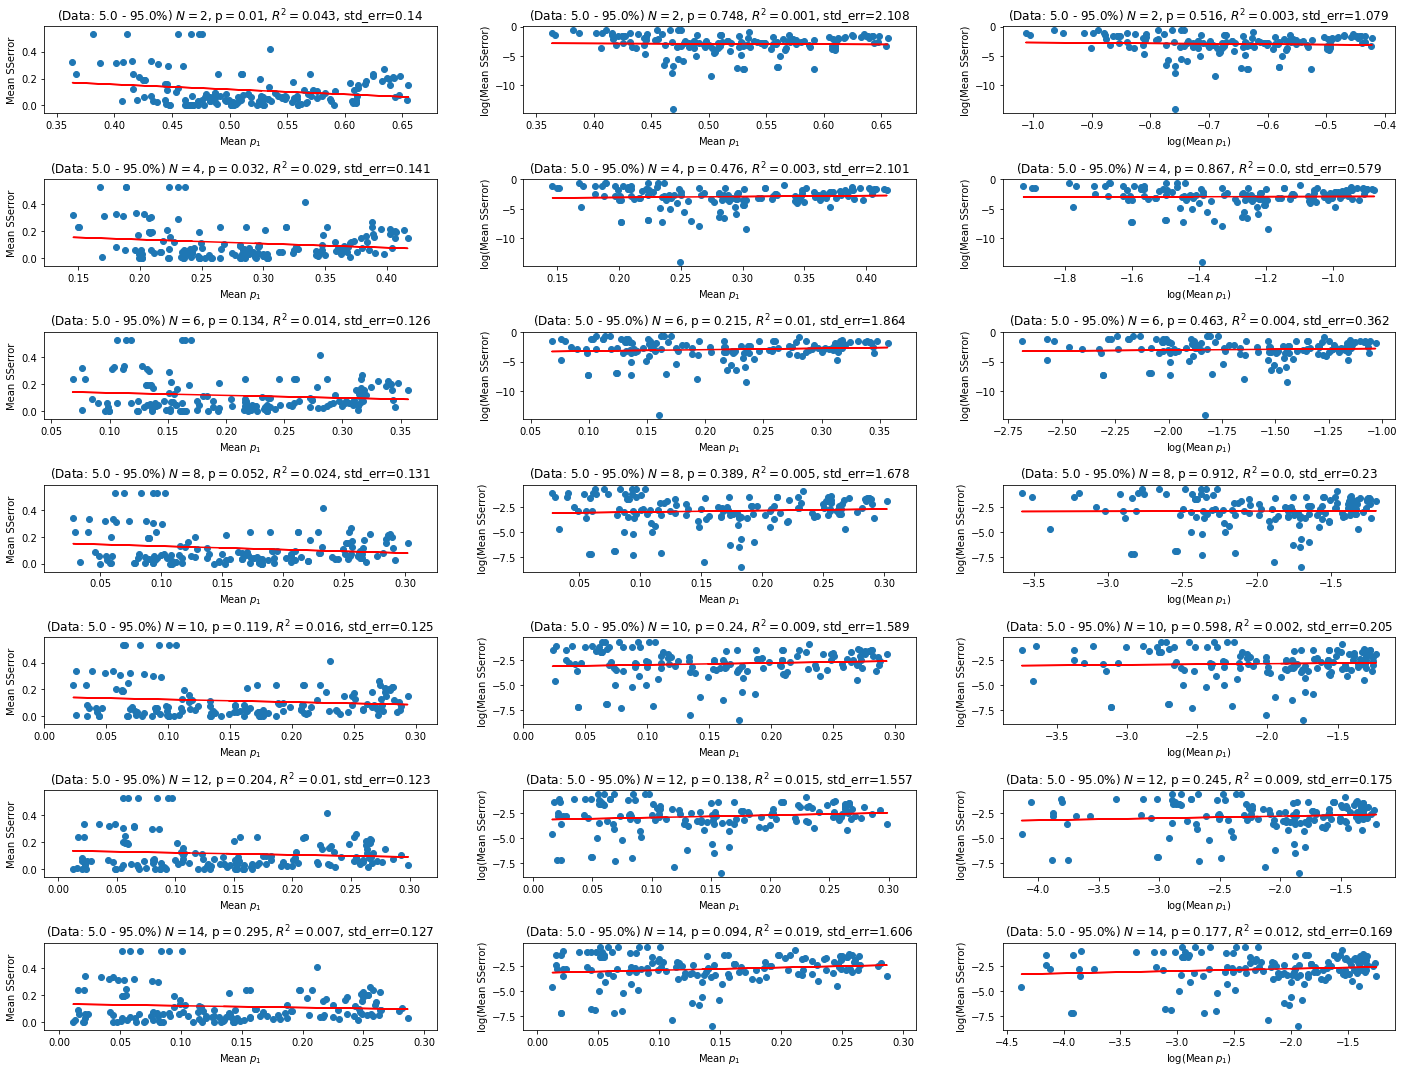

In [50]:
plot_quantiles(lower_quantile=0.05, upper_quantile=0.95)

/home/vince/anaconda3/envs/testing-zd/lib/python3.6/site-packages/ipykernel/__main__.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/vince/anaconda3/envs/testing-zd/lib/python3.6/site-packages/ipykernel/__main__.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


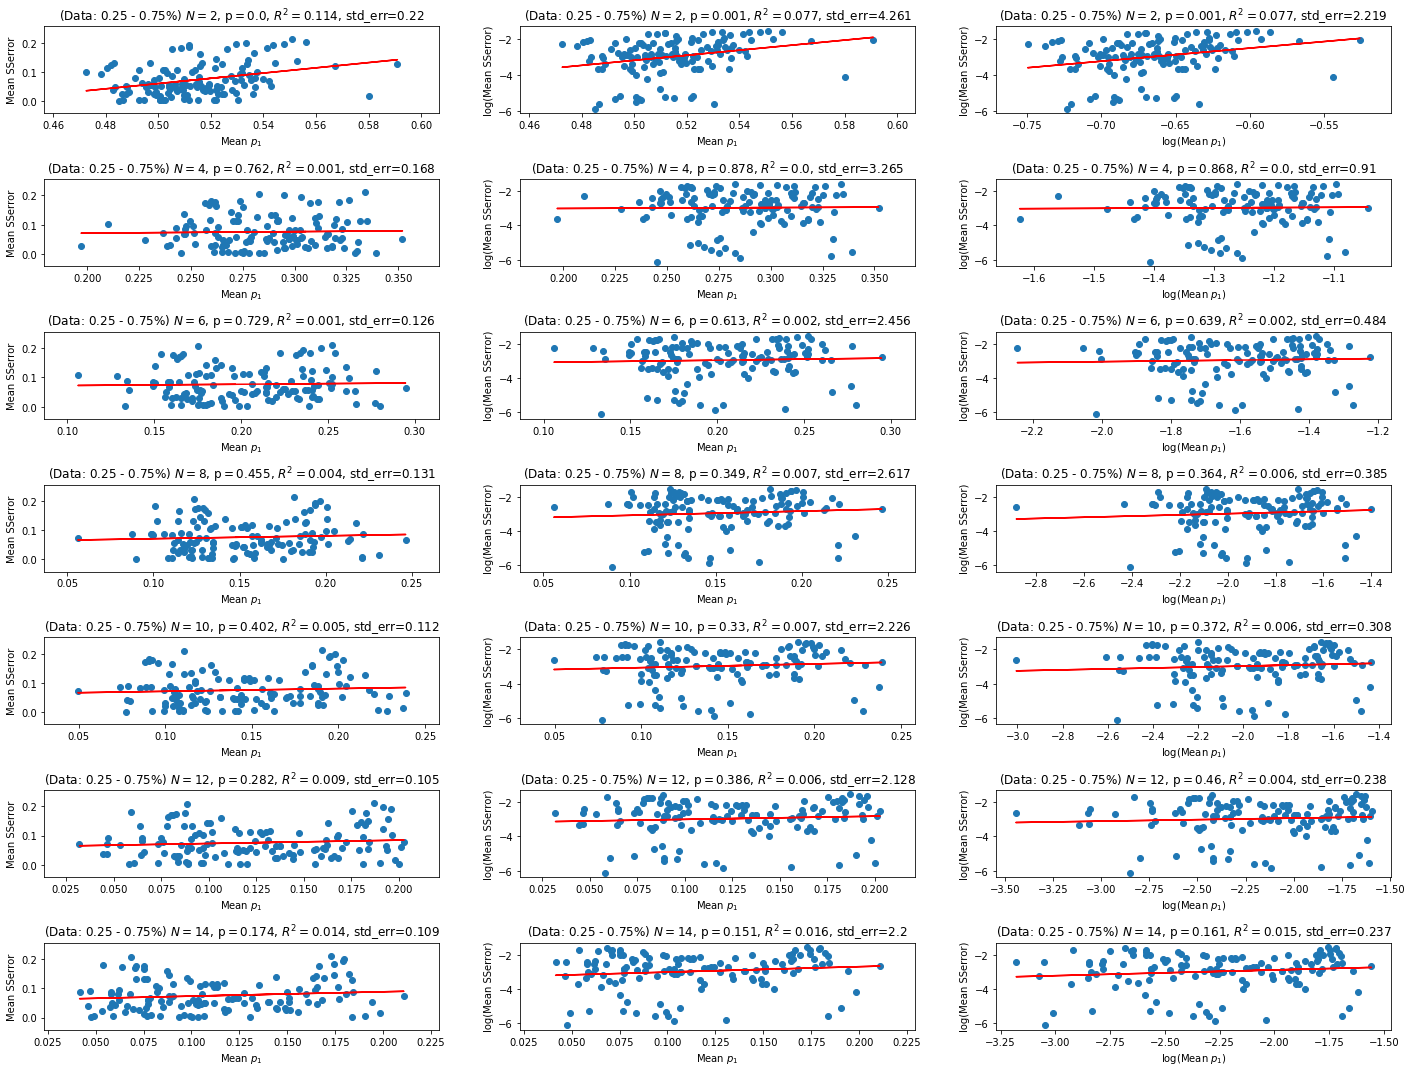

In [22]:
plot_quantiles(lower_quantile=0.25, upper_quantile=0.75)

/home/vince/anaconda3/envs/testing-zd/lib/python3.6/site-packages/ipykernel/__main__.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/vince/anaconda3/envs/testing-zd/lib/python3.6/site-packages/ipykernel/__main__.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/vince/anaconda3/envs/testing-zd/lib/python3.6/site-packages/ipykernel/__main__.py:41: RuntimeWarning: divide by zero encountered in log


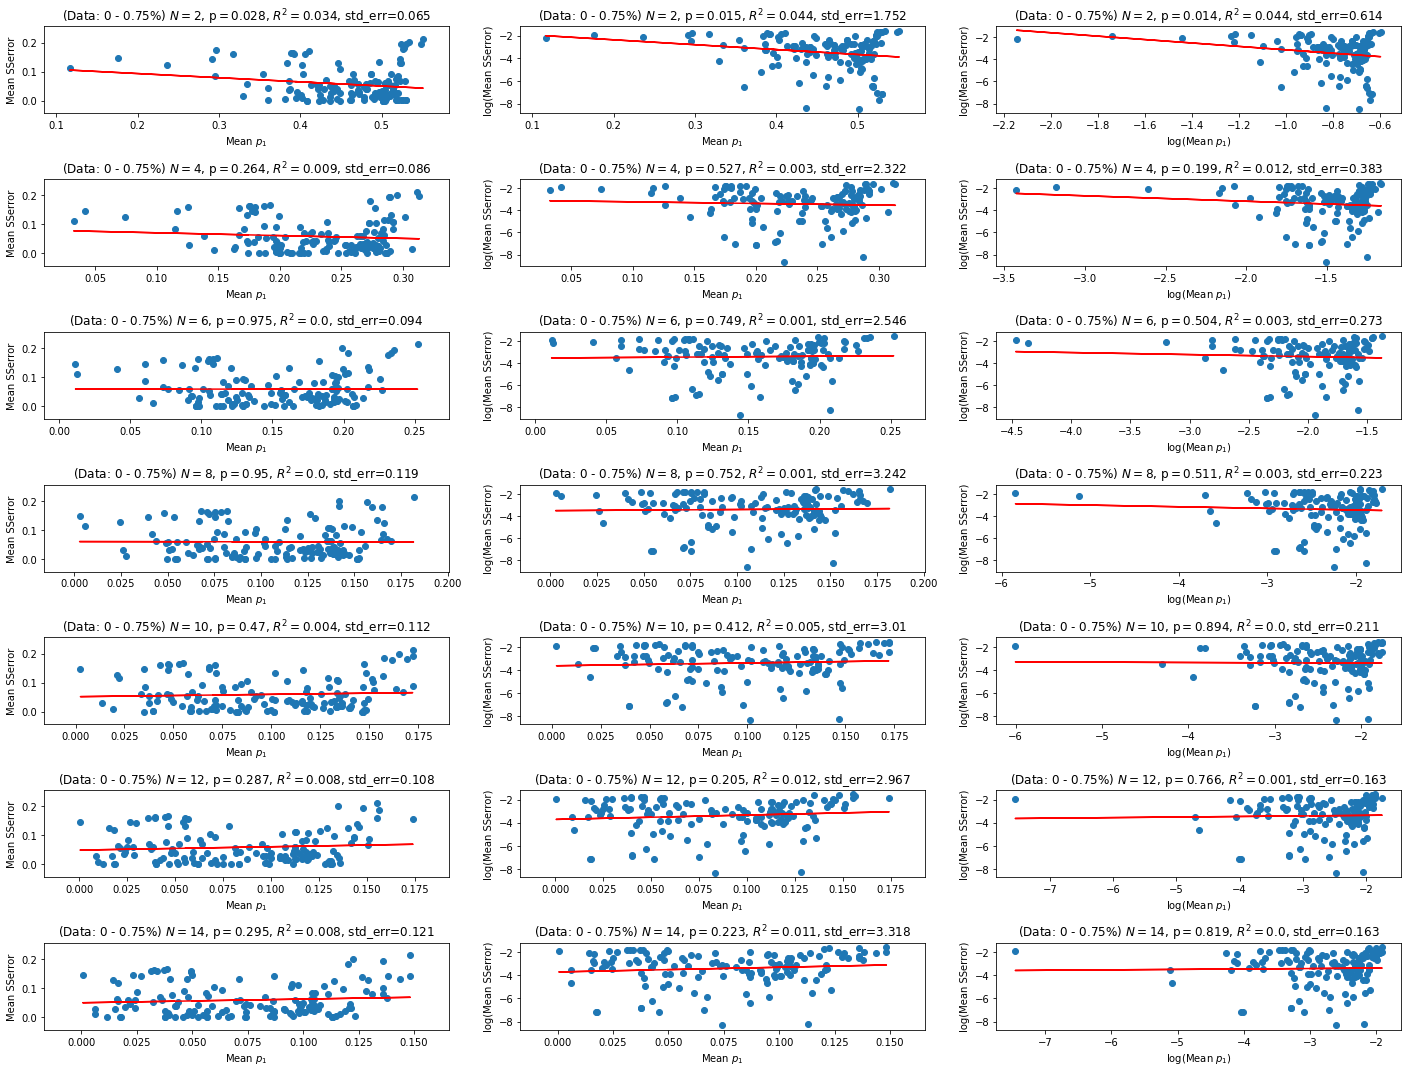

In [23]:
plot_quantiles(lower_quantile=0, upper_quantile=0.75)

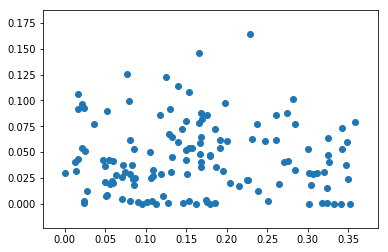

In [45]:
plt.scatter(summary_df["$p_1$"]["mean"], summary_df["coeff_of_variation"]);

In [ ]:
# TODO Add this plot with fitted line to plots. End here.